#Prepare a model for glass classification using KNN      
**Data Description:**        
RI : refractive index        
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)        
Mg: Magnesium      
AI: Aluminum       
Si: Silicon       
K:Potassium        
Ca: Calcium       
Ba: Barium       
Fe: Iron   

**Type: Type of glass: (class attribute)**      

1 : building_windows_float_processed   
2 : building_windows_non_float_processed     
3 : vehicle_windows_float_processed    
4 : vehicle_windows_non_float_processed (none in this database)    
5 : containers     
6 : tableware       
7 : headlamps   

In [1]:
import pandas as pd

In [3]:

df = pd.read_csv('/content/glass (1).csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


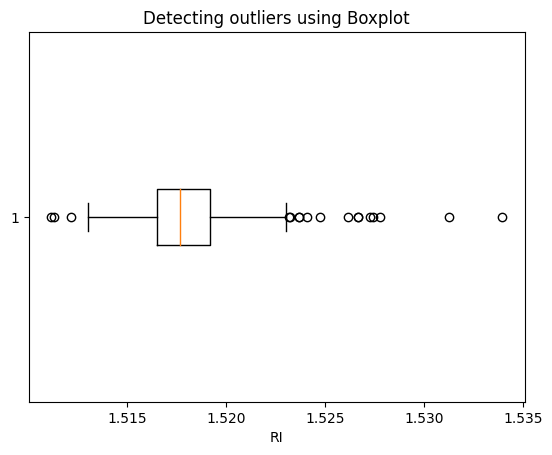

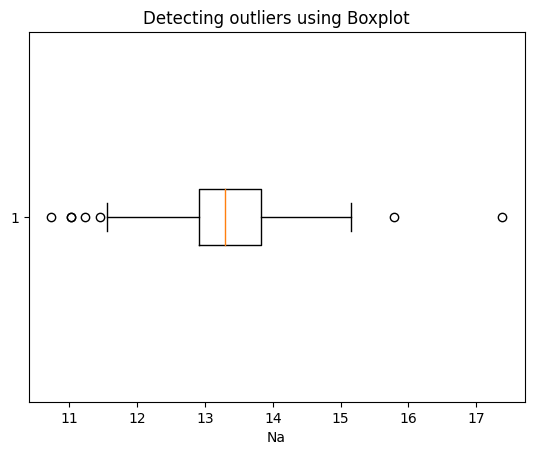

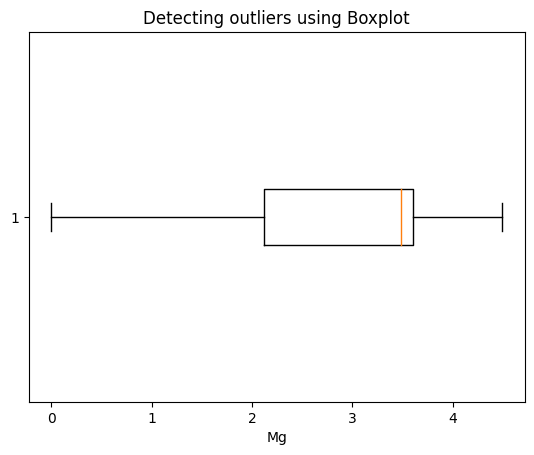

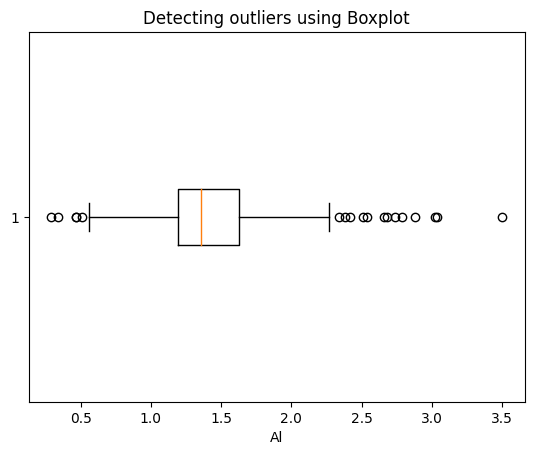

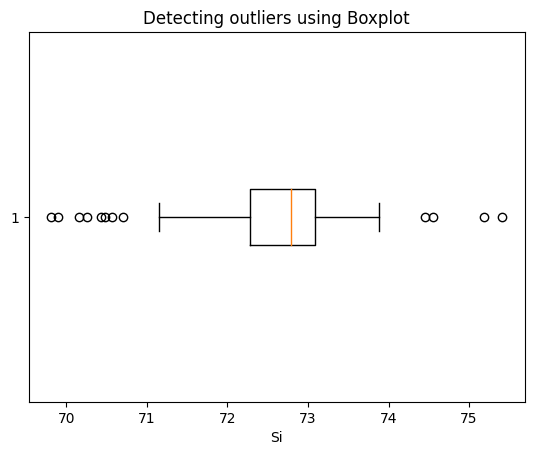

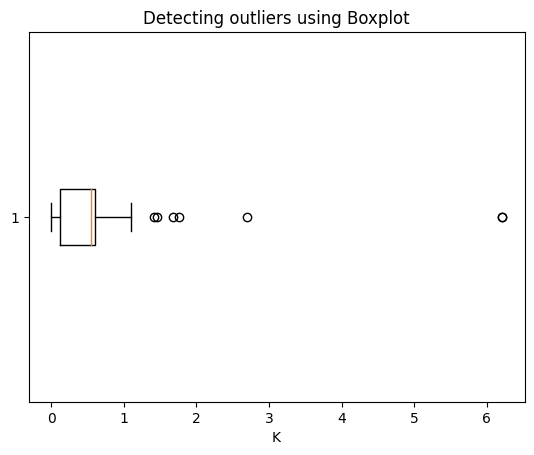

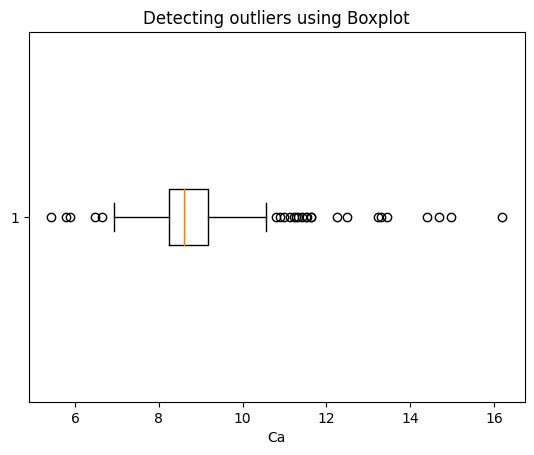

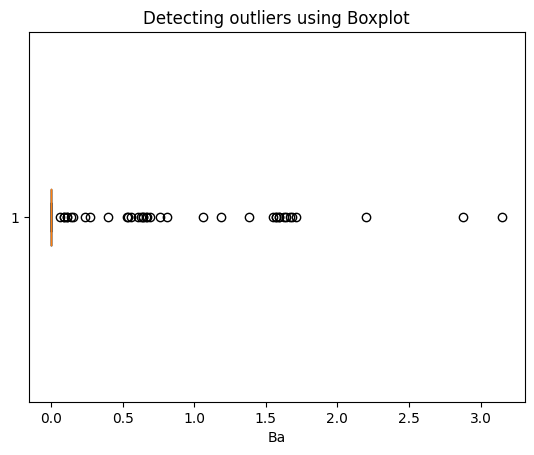

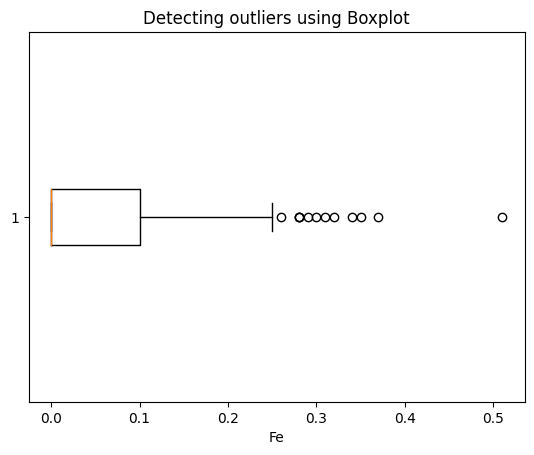

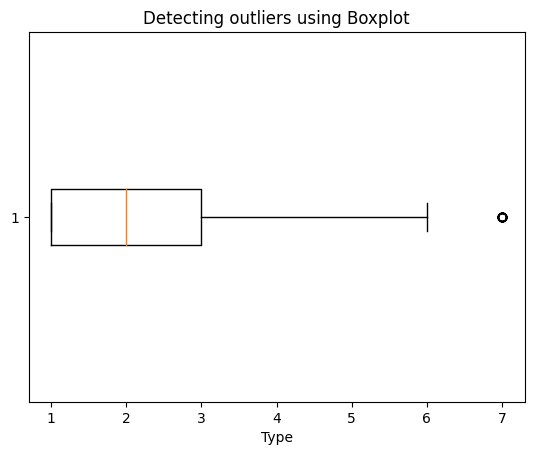

In [9]:

import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

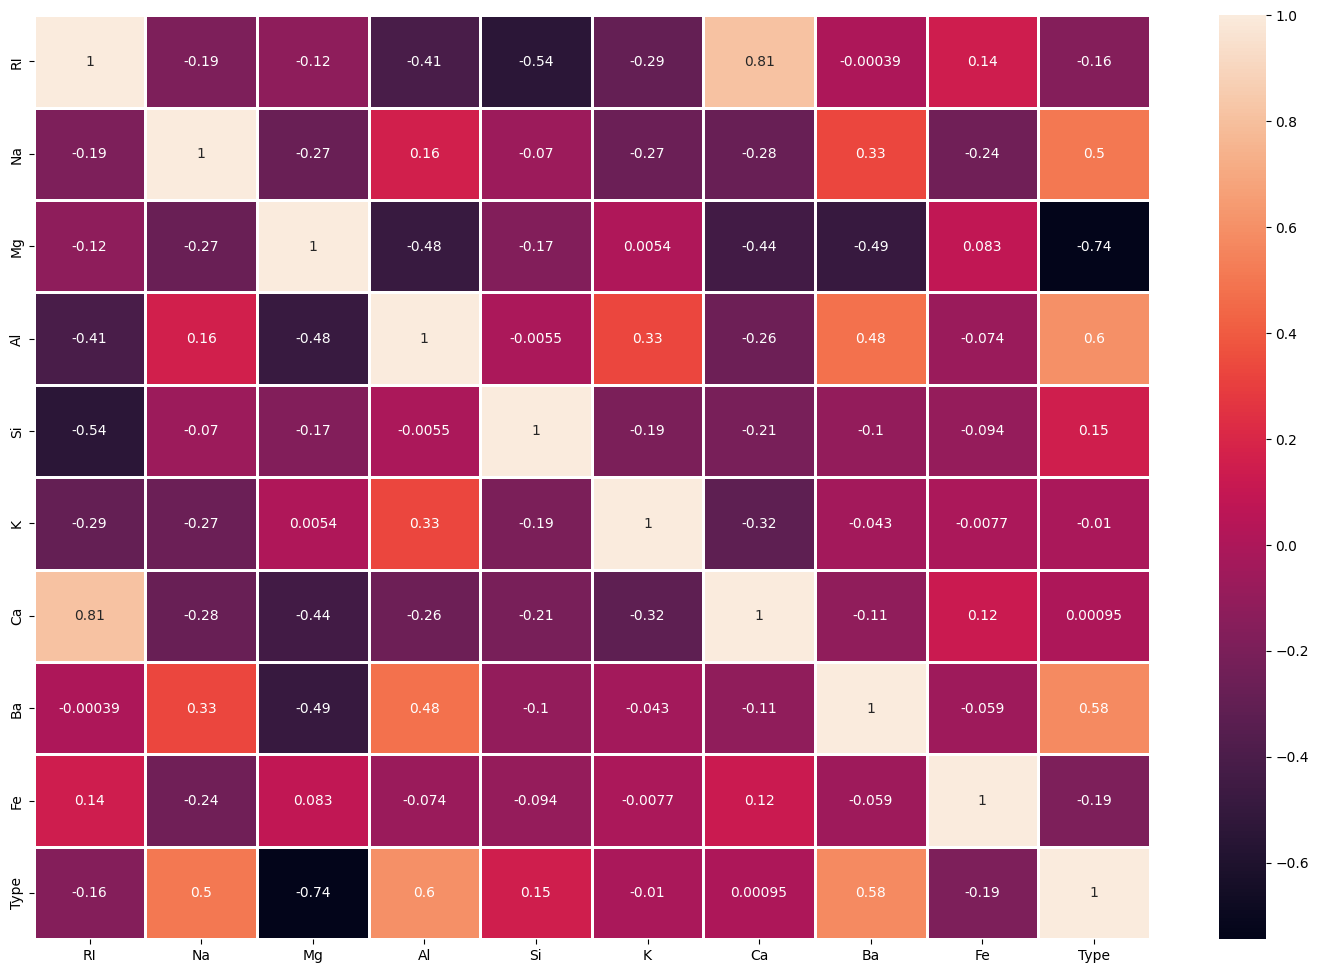

In [10]:

import seaborn as sns
plt.figure(figsize = (18, 12))
corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [11]:

from sklearn.model_selection import train_test_split
y = df['Type']
x = df.drop('Type', axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
predk = knn.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predk))
print ('\n clasification report:\n', classification_report(y_test, predk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predk))

Accuracy: 0.6511627906976745

 clasification report:
               precision    recall  f1-score   support

           1       0.56      0.82      0.67        11
           2       0.69      0.64      0.67        14
           3       0.50      0.33      0.40         3
           5       1.00      0.25      0.40         4
           6       0.50      0.33      0.40         3
           7       0.78      0.88      0.82         8

    accuracy                           0.65        43
   macro avg       0.67      0.54      0.56        43
weighted avg       0.68      0.65      0.63        43


 confussion matrix:
 [[9 1 1 0 0 0]
 [5 9 0 0 0 0]
 [2 0 1 0 0 0]
 [0 2 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 0 0 1 7]]


In [13]:
# Hyper parameter tuning

import numpy as np
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array(range(3,40))
params = dict(n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
optimize_model = GridSearchCV(estimator=knn, param_grid=params, verbose=1)
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)


Fitting 5 folds for each of 37 candidates, totalling 185 fits
Best parameters:  {'n_neighbors': 17}


In [14]:
knn = KNeighborsClassifier(n_neighbors=17, p=2)
knn.fit(x_train, y_train)
predk = knn.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predk))
print ('\n clasification report:\n', classification_report(y_test, predk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predk))

Accuracy: 0.6511627906976745

 clasification report:
               precision    recall  f1-score   support

           1       0.52      1.00      0.69        11
           2       0.73      0.57      0.64        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         3
           7       0.78      0.88      0.82         8

    accuracy                           0.65        43
   macro avg       0.50      0.49      0.47        43
weighted avg       0.61      0.65      0.60        43


 confussion matrix:
 [[11  0  0  0  0  0]
 [ 6  8  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 1  0  0  0  0  2]
 [ 0  1  0  0  0  7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
